In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import json

In [3]:
def load_json(fname):
    with open(fname) as f:
        df = pd.DataFrame(json.load(f))
    return df

In [4]:
def summary_plot(df, pattern="results/weights_{}/summary.csv"):
    if isinstance(df, str):
        df = pd.read_csv(pattern.format(df))

    fig, axs = plt.subplots(1, 2, figsize=(16, 6))
    df = df[df["stage"] <= 2]
    for stage in df["stage"].unique():
        filtered = df[df["stage"] == stage]
        axs[0].plot(
            filtered["period"], filtered["validation_loss"],
            label="stage " + str(stage))
        axs[1].plot(
            filtered["period"], filtered["training_loss_mean"],
            label="stage " + str(stage))
    axs[0].set_title("Validation Loss")
    axs[0].legend()
    axs[1].set_title("Training Loss")
    axs[1].legend()

In [5]:
def compare(o1, o2="results/baseline.json", name1="L2O", name2="Adam"):

    df1 = load_json(o1)
    df2 = load_json(o2)

    fig, axs = plt.subplots(1, 2, figsize=(16, 6))

    axs[0].plot(np.log(df1["loss"]), label=name1)
    axs[0].plot(np.log(df2["loss"]), label=name2)
    axs[0].legend()
    axs[0].set_title("Log training loss per epoch")

    axs[1].plot(df1["val_loss"], label=name1)
    axs[1].plot(df2["val_loss"], label=name2)
    axs[1].legend()
    axs[1].set_title("Validation loss per epoch")


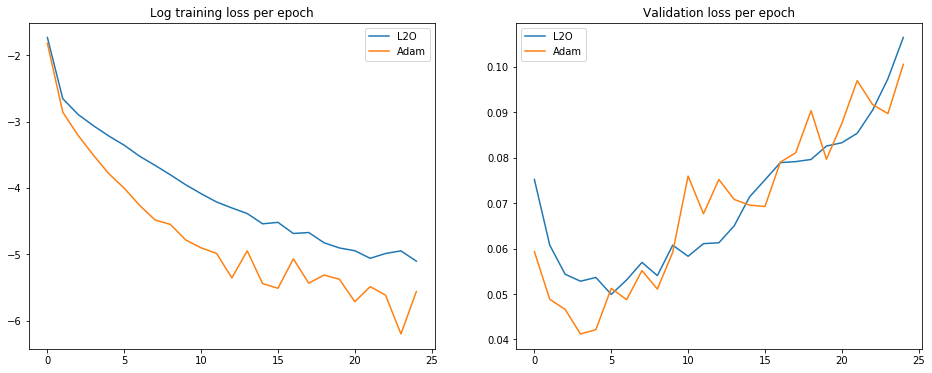

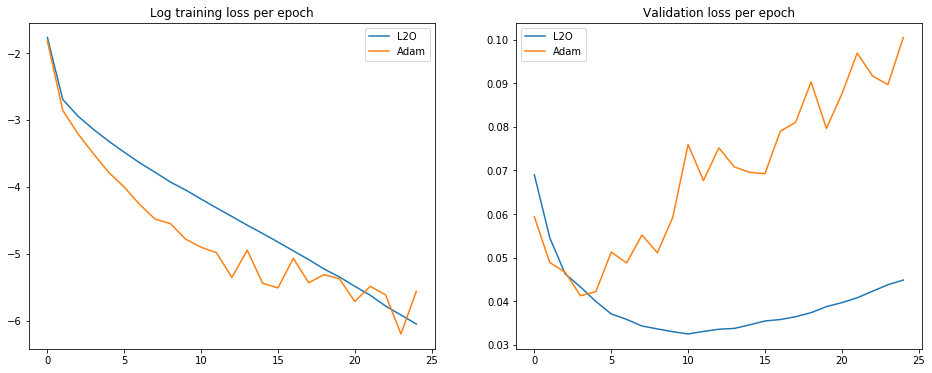

In [6]:
# Batch Size
compare("results/weights_imitation_1t_32b/stage_2/period_19.json")
compare("results/weights_imitation_1t_64b/stage_2/period_19.json")

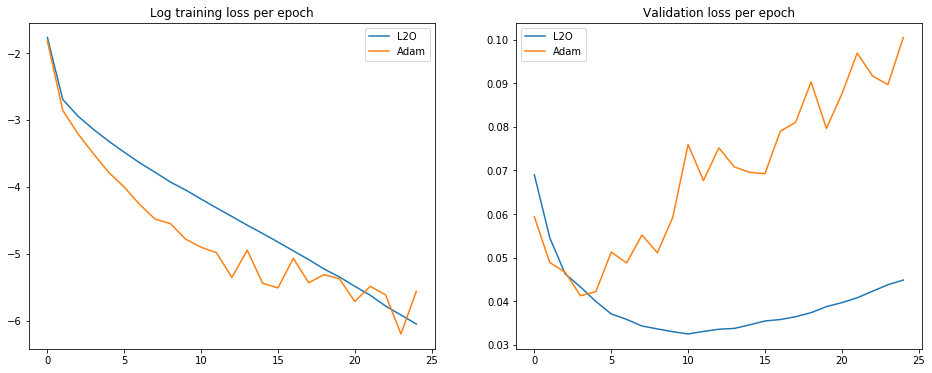

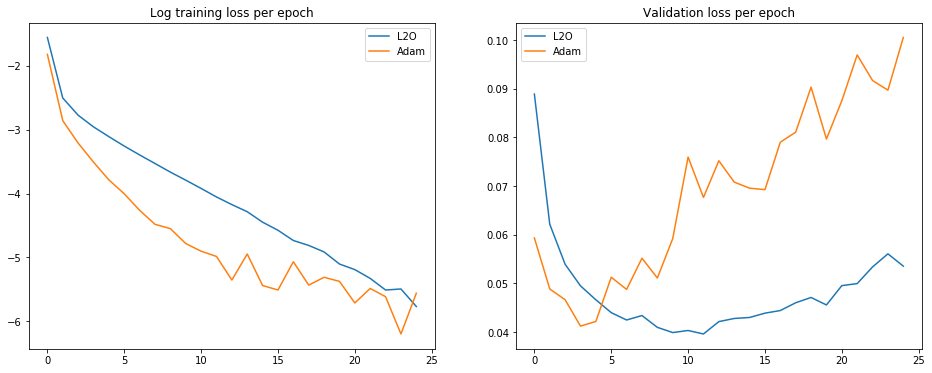

In [7]:
# Imitation Schedule
compare("results/weights_imitation_1t_64b/stage_2/period_19.json")
compare("results/weights_imitation_1t_64b_gradual/stage_2/period_19.json")

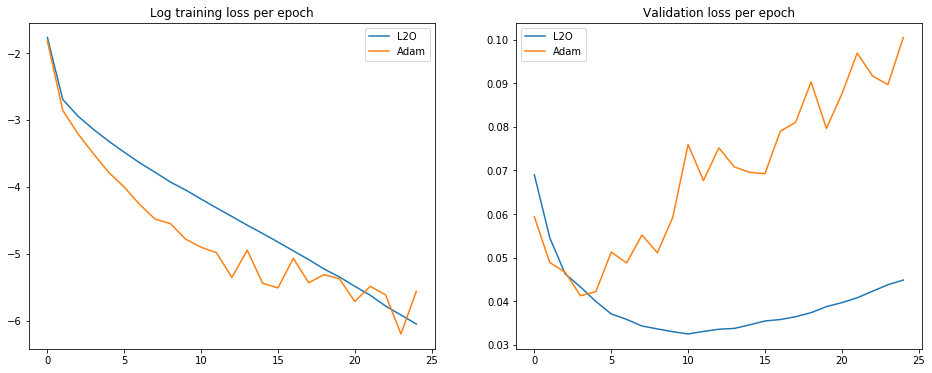

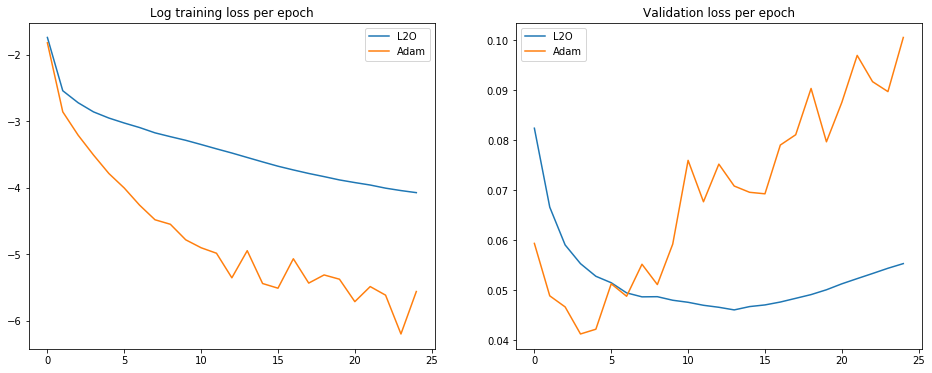

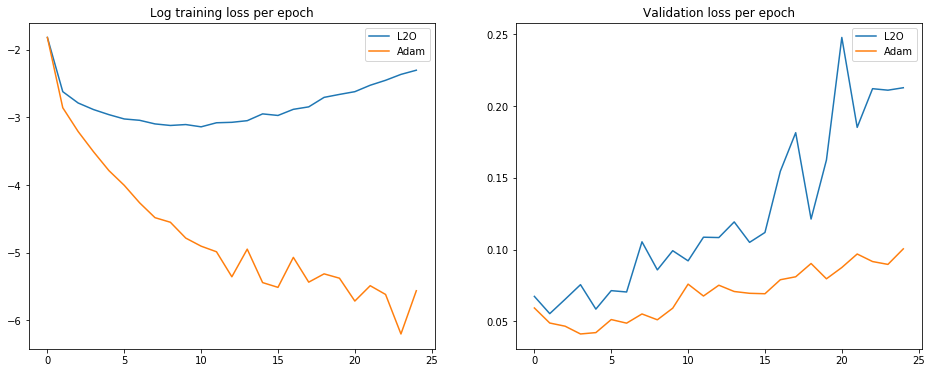

In [8]:
# Optimization Path Length
compare("results/weights_imitation_1t_64b/stage_2/period_19.json")
compare("results/weights_imitation_1t_64b_longer_repeat/stage_2/period_19.json")
compare("results/weights_imitation_1t_64b_longer/stage_2/period_19.json")

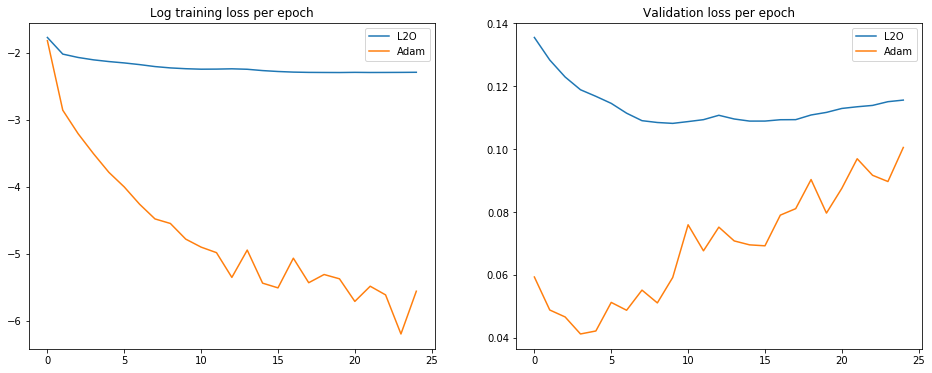

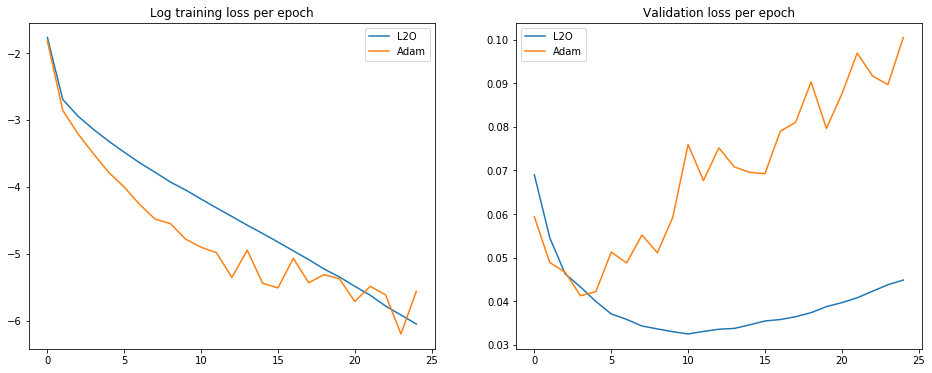

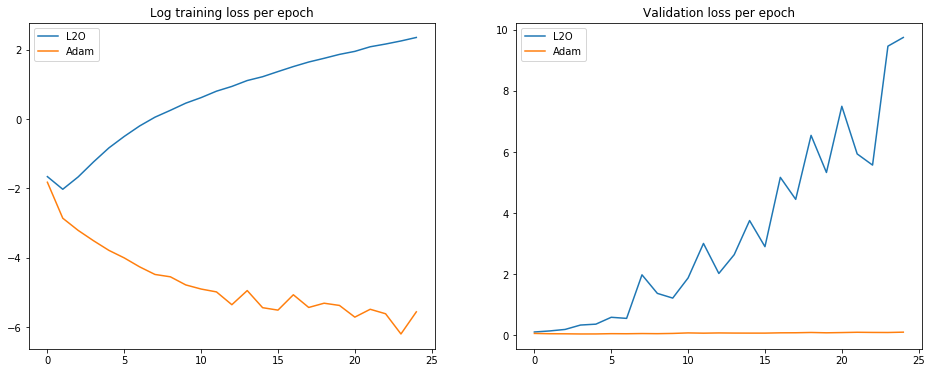

In [9]:
# Teachers
compare("results/weights_meta_64b/stage_2/period_19.json")
compare("results/weights_imitation_1t_64b/stage_2/period_19.json")
compare("results/weights_imitation_2t_64b/stage_2/period_19.json")

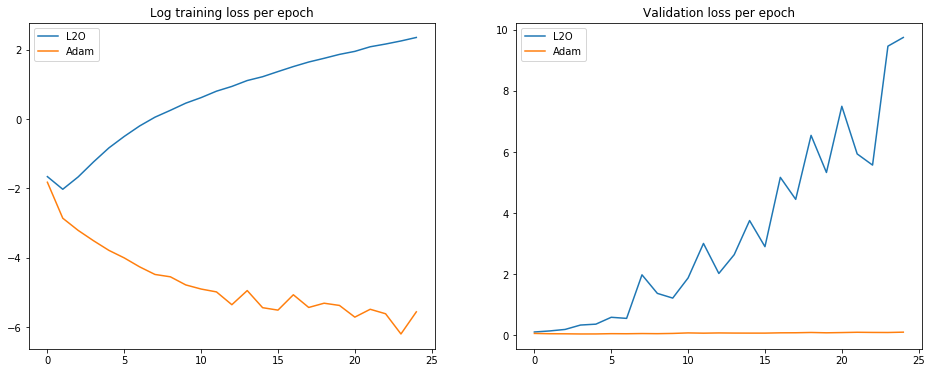

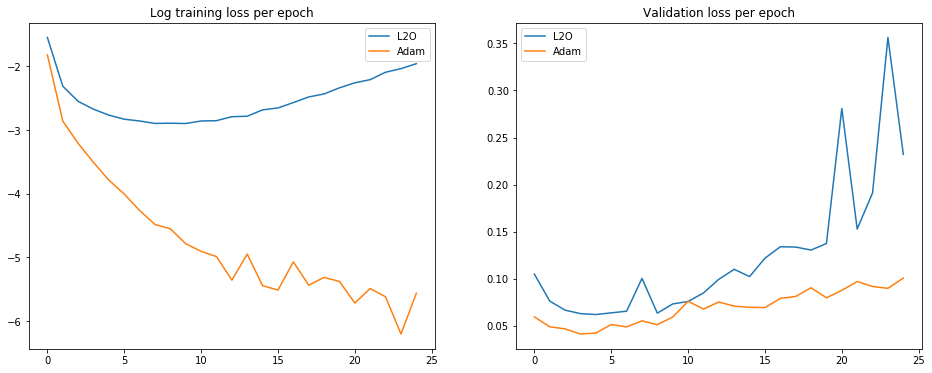

In [10]:
# Max vs Mean
compare("results/weights_imitation_2t_64b/stage_2/period_19.json")
compare("results/weights_imitation_2t_64b_max/stage_2/period_19.json")

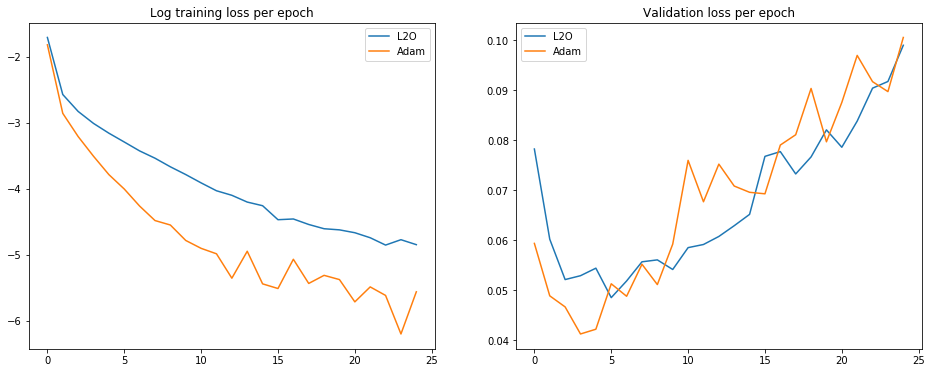

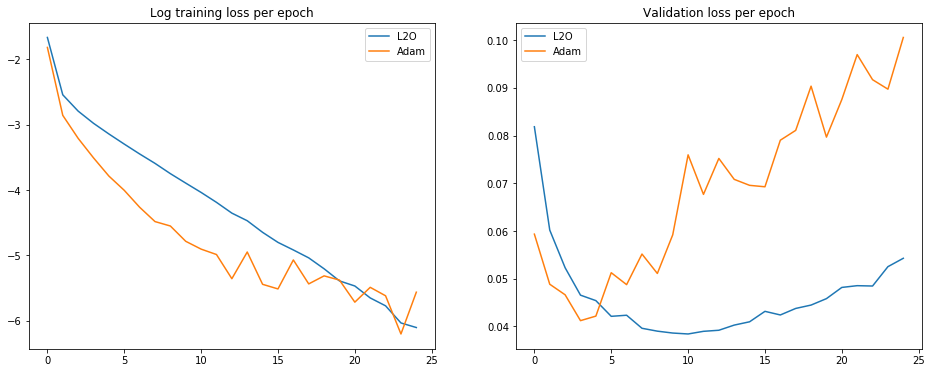

In [11]:
# Back 1 stage
compare("results/weights_imitation_2t_64b/stage_1/period_19.json")
compare("results/weights_imitation_2t_64b_max/stage_1/period_19.json")

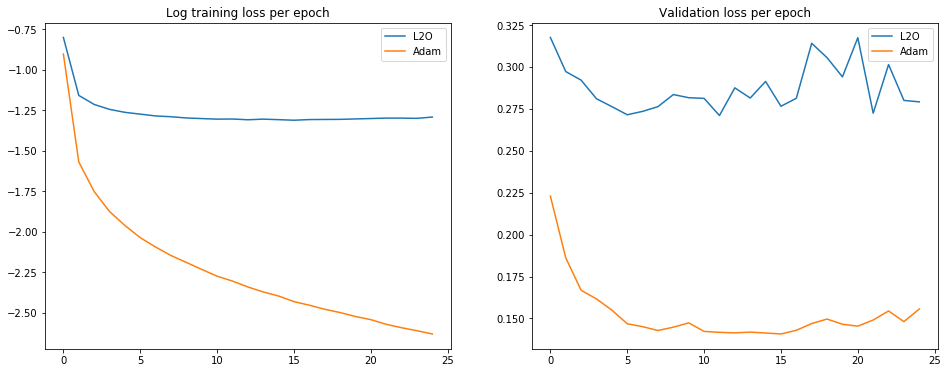

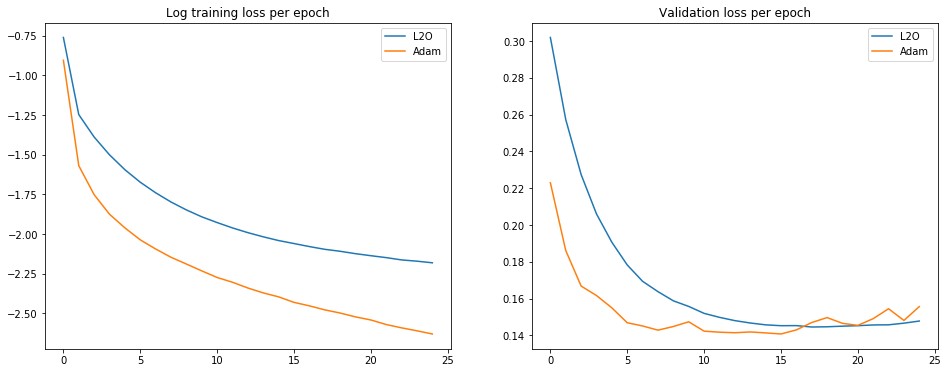

In [12]:
# Diagnosing: Is it overfitting?
compare("results/weights_imitation_2t_64b/stage_2/period_19_simple_mlp.json", "results/baseline_simple_mlp.json")
compare("results/weights_imitation_1t_64b/stage_2/period_19_simple_mlp.json", "results/baseline_simple_mlp.json")

(-0.1, -0.09)

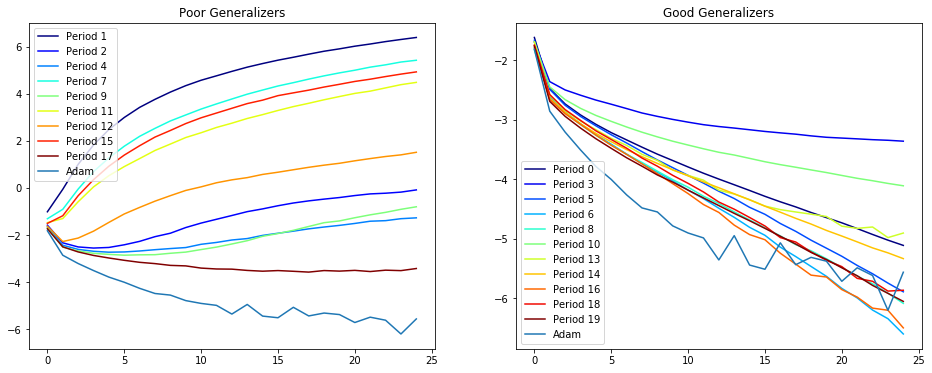

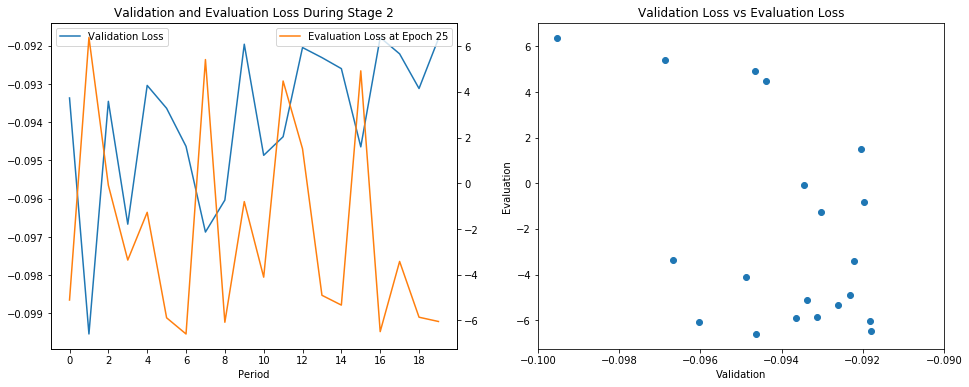

In [13]:
# Validation does not appear to be working
base = "results/weights_imitation_1t_64b/stage_2n/period_{}.json"
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
periods = [1, 2, 4, 7, 9, 11, 12, 15, 17]
for period, color in zip(periods, plt.cm.jet(np.linspace(0, 1, len(periods)))):
    try:
        df = load_json(base.format(period))
        axs[0].plot(np.log(df["loss"]), label="Period {}".format(period), color=color)
    except FileNotFoundError:
        pass
adam = load_json("results/baseline.json")
axs[0].plot(np.log(adam["loss"]), label="Adam")
axs[0].legend()
axs[0].set_title("Poor Generalizers")

periods = [0, 3, 5, 6, 8, 10, 13, 14, 16, 18, 19]
for period, color in zip(periods, plt.cm.jet(np.linspace(0, 1, len(periods)))):
    try:
        df = load_json(base.format(period))
        axs[1].plot(np.log(df["loss"]), label="Period {}".format(period), color=color)
    except FileNotFoundError:
        pass
adam = load_json("results/baseline.json")
axs[1].plot(np.log(adam["loss"]), label="Adam")
axs[1].legend()
axs[1].set_title("Good Generalizers")

df  = pd.read_csv("results/weights_imitation_1t_64b/summary.csv")
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
df = df[df["stage"] == 2]
df['at_epoch_end'] = [load_json(base.format(period))["loss"][24] for period in df["period"]]
axs[0].plot(df["period"], df["validation_loss"], label="Validation Loss")
axs_twin = axs[0].twinx()
axs_twin.plot(
    df["period"], np.log(df['at_epoch_end']), label="Evaluation Loss at Epoch 25",
    color="tab:orange")
axs[0].legend()
axs[0].set_title("Validation and Evaluation Loss During Stage 2")
axs[0].set_xticks(np.arange(0, 20, 2))
axs[0].set_xlabel("Period")
axs_twin.legend()

axs[1].scatter(df["validation_loss"], np.log(df["at_epoch_end"]))
axs[1].set_title("Validation Loss vs Evaluation Loss")
axs[1].set_xlabel("Validation")
axs[1].set_ylabel("Evaluation")
axs[1].set_xlim(-0.100, -0.090)


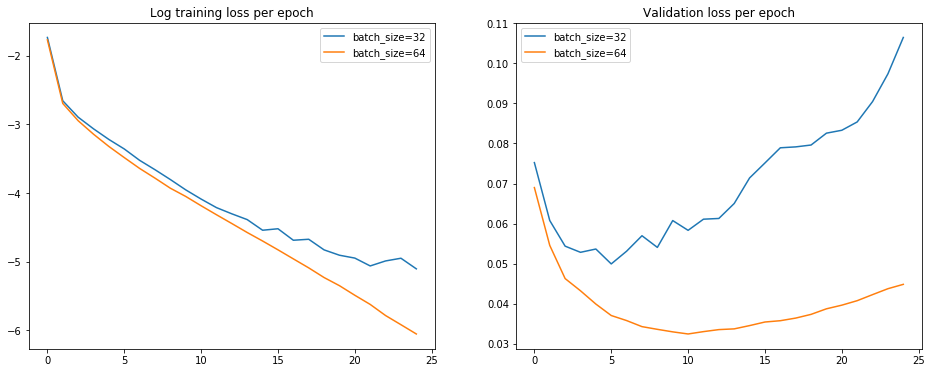

In [14]:
compare("results/weights_imitation_1t_32b/stage_2/period_19.json", "results/weights_imitation_1t_64b/stage_2/period_19.json", name1="batch_size=32", name2="batch_size=64")